# California Housing Price Prediction .

DESCRIPTION

Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Domain: Finance and Housing

Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

1. Load the data :

Read the “housing.csv” file from the folder into the program.
Print first few rows of this data.
Extract input (X) and output (Y) data from the dataset.
2. Handle missing values :

Fill the missing values with the mean of the respective column.
3. Encode categorical data :

Convert categorical column in the dataset to numerical data.
4. Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.
5. Standardize data :

Standardize training and test datasets.
6. Perform Linear Regression : 

Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

7. Bonus exercise: Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.
Dataset Description :

Field	Description
longitude	(signed numeric - float) : Longitude value for the block in California, USA
latitude	(numeric - float ) : Latitude value for the block in California, USA
housing_median_age	(numeric - int ) : Median age of the house in the block
total_rooms	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
total_bedrooms	(numeric - float ) : Count of the total number of bedrooms in all houses in the block
population	(numeric - int ) : Count of the total number of population in the block
households	(numeric - int ) : Count of the total number of households in the block
median_income	(numeric - float ) : Median of the total household income of all the houses in the block
ocean_proximity	(numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
median_house_value	(numeric - int ) : Median of the household prices of all the houses in the block
 

Dataset Size : 20640 rows x 10 columns

In [613]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [614]:
%config IPCompleter.greedy=True

In [615]:
ca = pd.read_excel("1553768847_housing.xlsx")

In [616]:
ca.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [617]:
ca.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [618]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [619]:
ca[ca["total_bedrooms"].isnull()].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,207.000000,207.000000,207.000000,207.000000,0.0,207.000000,207.000000,207.000000,207.000000
mean,-119.472560,35.497633,29.270531,2562.603865,NaN,1477.772947,510.024155,3.822244,206007.280193
std,2.001424,2.097298,11.964927,1787.269789,NaN,1057.448212,386.120704,1.955595,111638.214545
min,-124.130000,32.660000,4.000000,154.000000,NaN,37.000000,16.000000,0.852700,45800.000000
25%,-121.810000,33.970000,19.000000,1307.500000,NaN,781.000000,258.000000,2.564150,128750.000000
50%,-118.490000,34.200000,30.000000,2155.000000,NaN,1217.000000,427.000000,3.411500,175000.000000
75%,-117.985000,37.495000,38.000000,3465.000000,NaN,1889.500000,628.000000,4.615750,267700.000000
max,-114.590000,40.920000,52.000000,11709.000000,NaN,7604.000000,3589.000000,15.000100,500001.000000


In [620]:
ca["total_bedrooms"].std()

421.3850700740323

In [621]:
ca["total_bedrooms"].min()

1.0

In [622]:
ca["total_bedrooms"].max()

6445.0

In [623]:
ca["total_bedrooms"].mean()

537.8705525375618

In [624]:
ca["total_bedrooms"].median()

435.0

In [625]:
ca["total_rooms"].std()

2181.615251582795

In [626]:
ca["total_rooms"].min()

2

In [627]:
ca["total_rooms"].max()

39320

In [628]:
ca["total_rooms"].median()

2127.0

In [629]:
ca["total_rooms"].median()/ca["total_bedrooms"].median()

4.889655172413793

In [630]:
ca["total_bedrooms"] = ca["total_bedrooms"].fillna(0)

In [631]:
ca["total_bedrooms"].count()

20640

In [632]:
total_bedrooms_null = ca.loc[ca["total_bedrooms"].isnull(), "total_rooms"]

In [633]:
print(total_bedrooms_null)

Series([], Name: total_rooms, dtype: int64)


In [634]:
ca["total_bedrooms"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool

In [635]:
for i in ca.index:
    if ca['total_bedrooms'][i]==0:
        ca['total_bedrooms'][i] = ca['total_rooms'][i]/5

C:\Users\SaaiM\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [636]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [637]:
ca.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.616318,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.792318,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


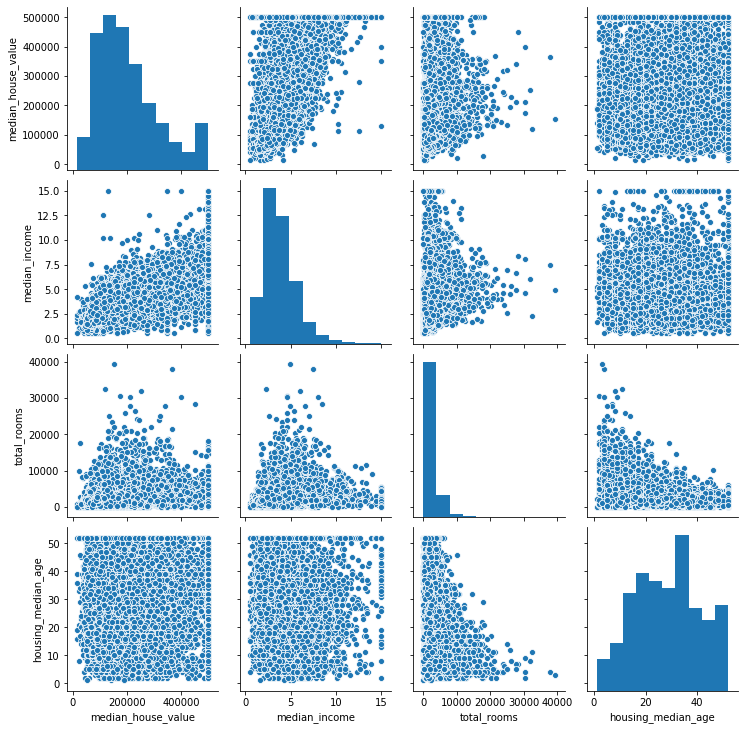

In [638]:
sns.pairplot(ca[['median_house_value','median_income','total_rooms','housing_median_age']])

In [639]:
ca.ocean_proximity.unique() 

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [640]:
ca = pd.concat([ca.drop('ocean_proximity', axis=1), pd.get_dummies(ca['ocean_proximity'])], axis=1)

In [641]:
#ca['near_bay'] = ca.apply(lambda row: 1 if row.ocean_proximity=="NEAR BAY" else (0), axis = 1)
#ca['1h_ocean'] = ca.apply(lambda row: 1 if row.ocean_proximity=="<1H OCEAN" else (0), axis = 1)
#ca['inland'] = ca.apply(lambda row: 1 if row.ocean_proximity=="INLAND" else (0), axis = 1)
#ca['island'] = ca.apply(lambda row: 1 if row.ocean_proximity=="ISLAND" else (0), axis = 1)
#ca['near_ocean'] = ca.apply(lambda row: 1 if row.ocean_proximity=="NEAR OCEAN" else (0), axis = 1)

In [642]:
#ca = ca.drop("ocean_proximity",1)

In [643]:
ca

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


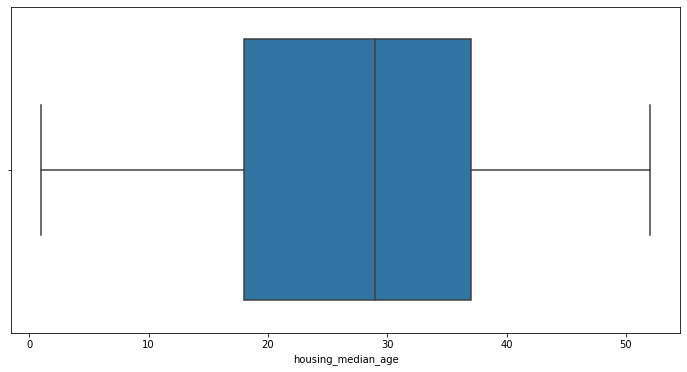

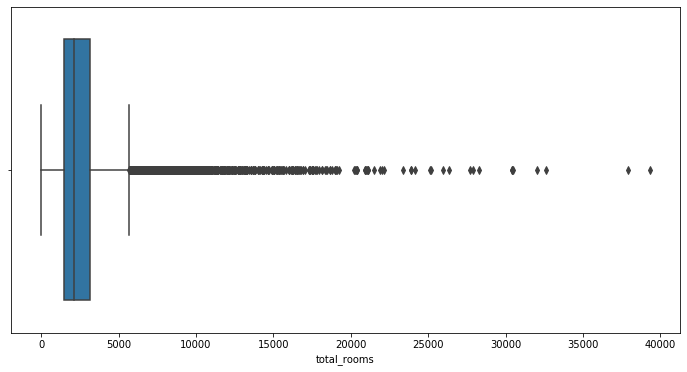

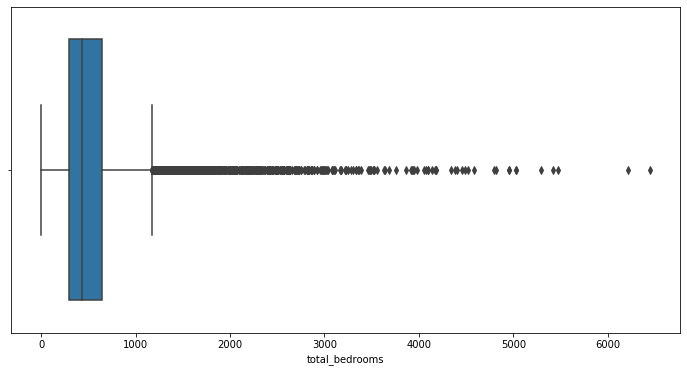

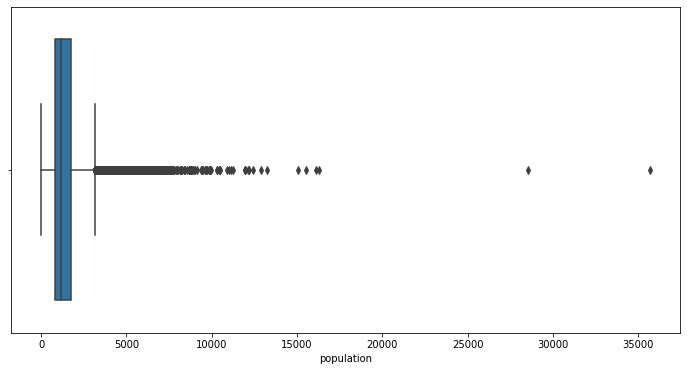

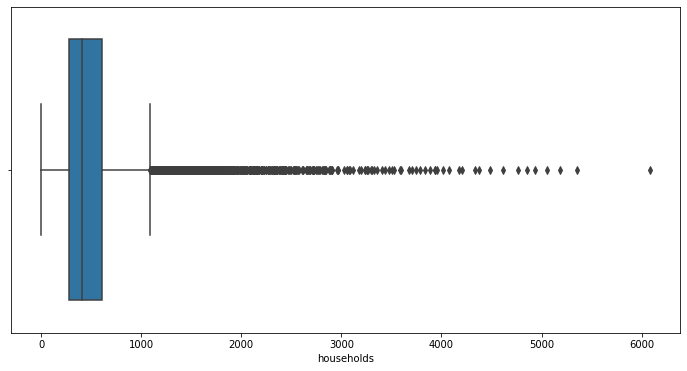

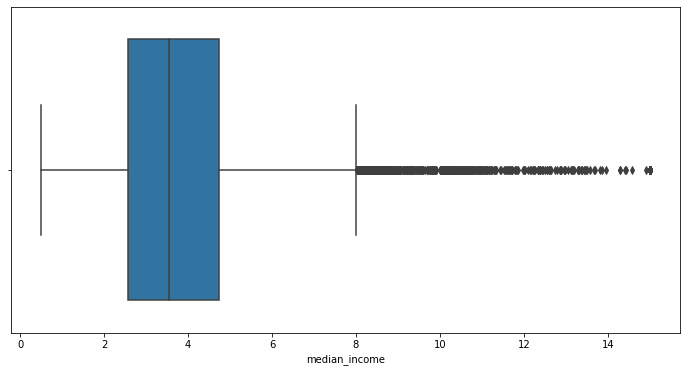

In [644]:
num_features=['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=ca,ax=ax)

In [645]:
class RemoveOutliers(BaseEstimator,TransformerMixin):
    def fit (self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X=X[(X['total_rooms']<=4400)].reset_index(drop=True)
        X=X[X['total_bedrooms']<=900].reset_index(drop=True)
        X=X[X['population']<=2400].reset_index(drop=True)
        X=X[X['households']<=810].reset_index(drop=True)
        X=X[X['median_income']<=7.5].reset_index(drop=True)
        return X
ca1=ca.copy()
ca1=RemoveOutliers().fit_transform(ca1)

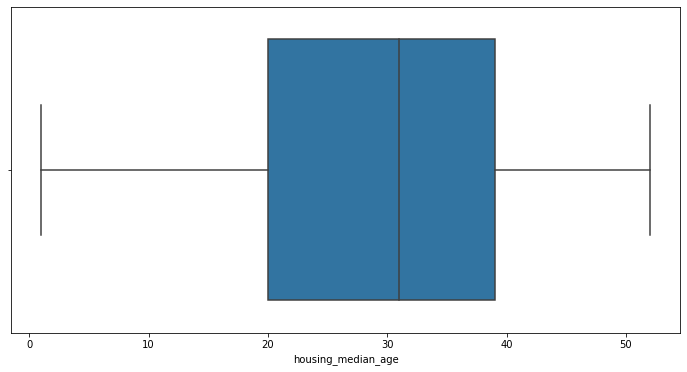

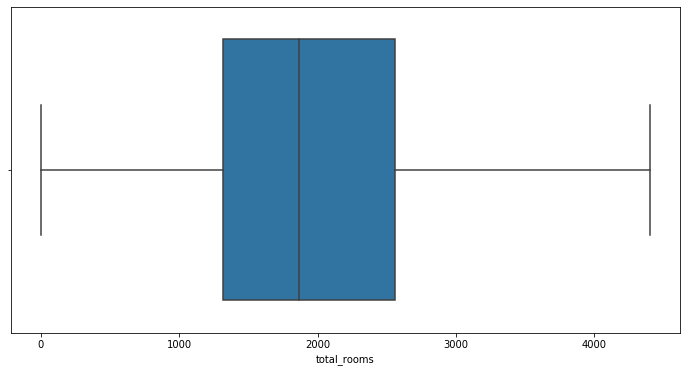

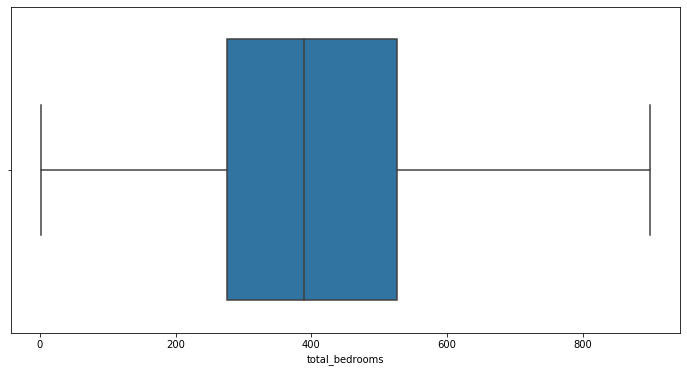

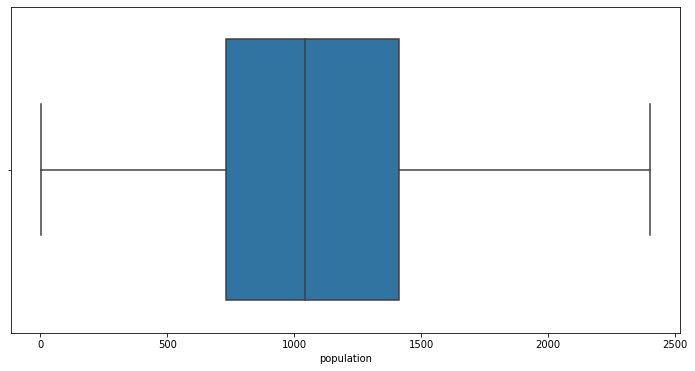

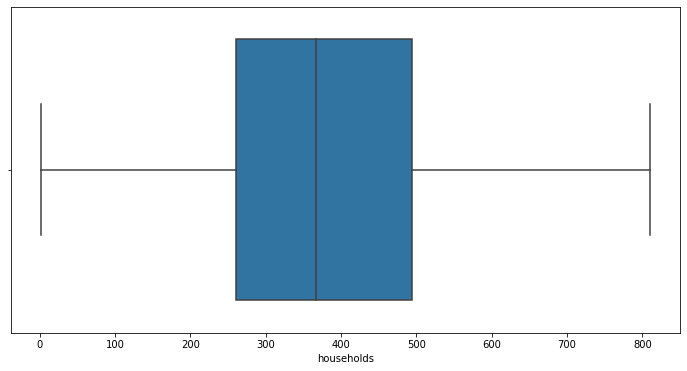

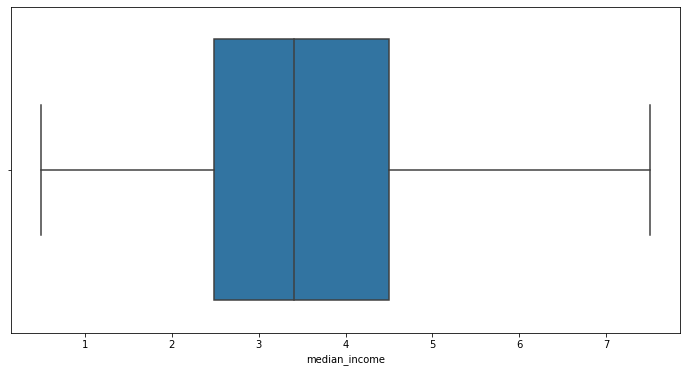

In [646]:
num_features=['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=ca1,ax=ax)

In [647]:
y = ca1.median_house_value
X = ca1.drop("median_house_value",1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
1,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0
3,-122.25,37.85,52,919,213.0,413,193,4.0368,0,0,0,1,0
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,0,0,0,1,0


                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.922579           -0.086899    -0.020757   
latitude            -0.922579  1.000000           -0.019317     0.017833   
housing_median_age  -0.086899 -0.019317            1.000000    -0.224164   
total_rooms         -0.020757  0.017833           -0.224164     1.000000   
total_bedrooms       0.019039 -0.034492           -0.161559     0.878716   
population           0.111943 -0.141207           -0.136869     0.739644   
households           0.021316 -0.062567           -0.128297     0.870664   
median_income        0.002748 -0.101689           -0.124146     0.290063   
<1H OCEAN            0.335314 -0.458529            0.061825    -0.011369   
INLAND              -0.080988  0.376640           -0.253349     0.000509   
ISLAND               0.011093 -0.018956            0.017223    -0.007449   
NEAR BAY            -0.468242  0.342979            0.267525    -0.004128   
NEAR OCEAN  

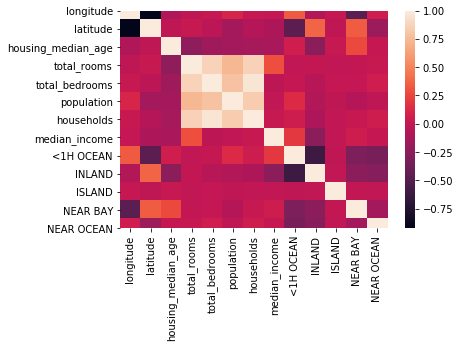

In [648]:
cm=X.corr(method='pearson')
print (cm)
ax = sns.heatmap(cm)

In [649]:
y

0        352100
1        341300
2        342200
3        269700
4        299200
          ...  
16340     78100
16341     77100
16342     92300
16343     84700
16344     89400
Name: median_house_value, Length: 16345, dtype: int64

In [650]:
X.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,16345.000000,16345.000000,16345.000000,16345.000000,16345.000000,16345.000000,16345.000000,16345.000000,16345.000000,16345.000000,16345.000000,16345.000000,16345.000000
mean,-119.624863,35.711583,30.381462,1959.502784,405.261817,1083.802814,379.840624,3.570008,0.427898,0.330315,0.000306,0.112389,0.129091
std,2.004146,2.171972,12.206848,903.923114,180.838211,494.572423,168.494661,1.421623,0.494789,0.470341,0.017488,0.315854,0.335311
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.940000,20.000000,1314.000000,276.000000,730.000000,261.000000,2.484400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.670000,34.390000,31.000000,1868.000000,390.000000,1043.000000,367.000000,3.406300,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.050000,37.750000,39.000000,2557.000000,526.000000,1413.000000,494.000000,4.505200,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.490000,41.950000,52.000000,4400.000000,899.000000,2400.000000,810.000000,7.500000,1.000000,1.000000,1.000000,1.000000,1.000000


In [651]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
1,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0
3,-122.25,37.85,52,919,213.0,413,193,4.0368,0,0,0,1,0
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,0,0,0,1,0


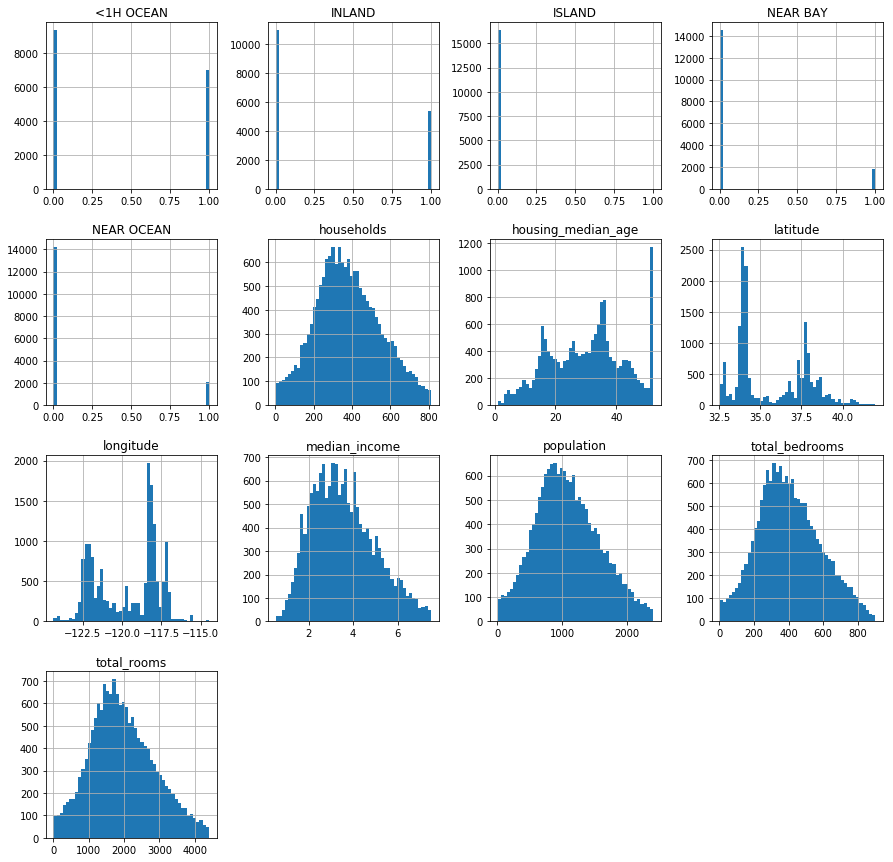

In [652]:
X.hist(bins=50, figsize=(15,15))
plt.show()

In [653]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(13076, 13) (13076,)
(3269, 13) (3269,)


In [654]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [655]:
predictions

array([ 85748.89793075, 266460.06211945, 221875.22682962, ...,
       231853.47918823, 307286.3703118 , 221851.04271576])

Text(0, 0.5, 'Predictions')

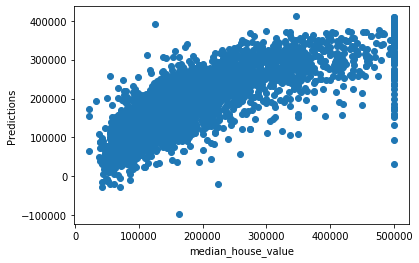

In [656]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("median_house_value")
plt.ylabel("Predictions")

In [657]:
print ("Score:", model.score(X_test, y_test))

Score: 0.6023737298050298


In [658]:
print ("Score:", model.score(X_train, y_train))

Score: 0.60959409036607


In [659]:
y_pred = lm.predict(X_test)

In [660]:
print(metrics.mean_absolute_error(y_test, y_pred)) #MAE

48210.6469545254


In [661]:
print(metrics.mean_squared_error(y_test, y_pred)) #MSE

4459242559.950276


In [662]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

66777.56030247195


# Bonus

In [663]:
median_income_train = X_train[["median_income"]]
median_income_test = X_test[["median_income"]]

In [664]:
#X_train_ME = X_train.drop("median_income",1)
#X_test_ME = X_test.drop("median_income",1)
y_train

4330      90600
98       259400
7560     309100
6457     175000
12068    290000
          ...  
5781     213300
12674    339800
12065    369400
13549    155700
10463    161800
Name: median_house_value, Length: 13076, dtype: int64

In [665]:
median_income_train

,median_income
4330,2.2969
98,3.1691
7560,4.1379
6457,4.1708
12068,4.0270
...,...
5781,5.1377
12674,5.8096
12065,3.2984
13549,2.0096


In [666]:
median_income_test

,median_income
10196,2.4844
1307,4.6424
13276,3.5000
11294,2.1164
7239,5.3316
...,...
3593,6.5195
11859,4.0391
664,3.2434
381,5.3989


In [667]:
# fit a model
lm = linear_model.LinearRegression()
SLmodel = lm.fit(median_income_train, y_train)

In [668]:
SLmodel.score(median_income_train, y_train)

0.37425277699733994

In [669]:
SLmodel.score(median_income_test, y_test)

0.38085620877140014

In [670]:
SLpredictions = SLmodel.predict(median_income_test)

Text(0, 0.5, 'Predictions')

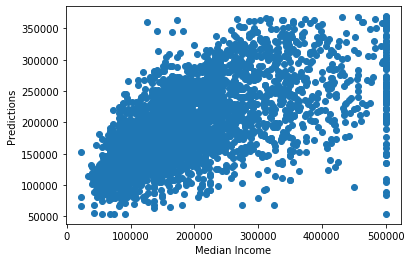

In [671]:
## The line / model
plt.scatter(y_test, SLpredictions)
plt.xlabel("Median Income")
plt.ylabel("Predictions")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013FB52B9470>,
      dtype=object)

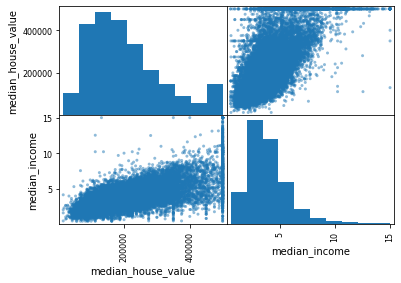

In [672]:
attributes = ['median_house_value', 'median_income']
scatter_matrix(ca[attributes])

In [673]:
import matplotlib.pyplot as plt

In [674]:
%matplotlib inline

In [675]:
X_new = pd.DataFrame({"median_house_value": [ca["median_house_value"].min(), ca["median_income"].max()]})

In [676]:
X_new

,median_house_value
0,14999.0000
1,15.0001


In [677]:
y_new = SLmodel.predict(X_new)

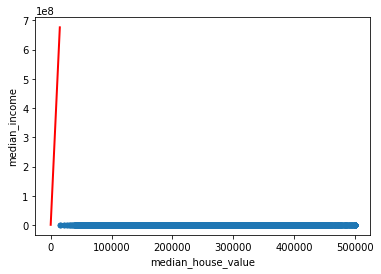

In [678]:
ca.plot(x = "median_house_value", y="median_income", kind = "scatter")
plt.plot(X_new, y_new, c= "red", linewidth = 2)